In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
DB_COVID_19="owid-covid-data.csv"
df_covid=pd.read_csv(DB_COVID_19)
print(df_covid.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [29]:
#esplorazione file 
dimensioni=df_covid.shape
print(f"Dimensioni del dataset:{dimensioni[0]} righe,{dimensioni[1]} colonne")
nomi_colonne=df_covid.columns
print(f"Intestazioni delle colonne: {list(nomi_colonne)}")

Dimensioni del dataset:387249 righe,67 colonne
Intestazioni delle colonne: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'peo

In [30]:
df_covid['date'].dtype

dtype('O')

In [31]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387249 entries, 0 to 387248
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    387249 non-null  object 
 1   continent                                   368722 non-null  object 
 2   location                                    387249 non-null  object 
 3   date                                        387249 non-null  object 
 4   total_cases                                 348333 non-null  float64
 5   new_cases                                   376280 non-null  float64
 6   new_cases_smoothed                          375050 non-null  float64
 7   total_deaths                                326109 non-null  float64
 8   new_deaths                                  376589 non-null  float64
 9   new_deaths_smoothed                         375359 non-null  float64
 

In [32]:
print(df_covid.describe(include='all'))

       iso_code continent  location        date   total_cases     new_cases  \
count    387249    368722    387249      387249  3.483330e+05  3.762800e+05   
unique      255         6       255        1553           NaN           NaN   
top         MYS    Africa  Malaysia  2022-04-20           NaN           NaN   
freq       1549     87439      1549         255           NaN           NaN   
mean        NaN       NaN       NaN         NaN  7.386532e+06  8.728781e+03   
std         NaN       NaN       NaN         NaN  4.398509e+07  2.397048e+05   
min         NaN       NaN       NaN         NaN  1.000000e+00  0.000000e+00   
25%         NaN       NaN       NaN         NaN  9.448000e+03  0.000000e+00   
50%         NaN       NaN       NaN         NaN  7.971300e+04  0.000000e+00   
75%         NaN       NaN       NaN         NaN  8.516680e+05  0.000000e+00   
max         NaN       NaN       NaN         NaN  7.749544e+08  4.423623e+07   

        new_cases_smoothed  total_deaths     new_de

In [33]:
print(df_covid.isnull().sum())

iso_code                                        0
continent                                   18527
location                                        0
date                                            0
total_cases                                 38916
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       374077
excess_mortality_cumulative                374077
excess_mortality                           374077
excess_mortality_cumulative_per_million    374077
Length: 67, dtype: int64


In [34]:
casi_totali = df_covid.dropna(subset=['continent']).groupby('continent')['total_cases'].max()
print(casi_totali)

continent
Africa             4072636.0
Asia              99343195.0
Europe            38997490.0
North America    103436829.0
Oceania           11812024.0
South America     37519960.0
Name: total_cases, dtype: float64


In [35]:
def confronta_continenti(df, continente1, continente2):
    totale_mondiale = df['new_cases'].sum()
    for continente in [continente1, continente2]:
        df_continente = df[(df['continent'] == continente) & df['new_cases'].notna()]
        
        minimo = df_continente['new_cases'].min()
        massimo = df_continente['new_cases'].max()
        media = df_continente['new_cases'].mean()
        totale_continente = df_continente['new_cases'].sum()
        
        percentuale_mondiale = (totale_continente / totale_mondiale) * 100
        
        print(f"Descrittori per {continente}:")
        print(f"Minimo: {minimo}, Massimo: {massimo}, Media: {media:.2f}")
        print(f"Percentuale del totale mondiale: {percentuale_mondiale:.2f}%\n")

confronta_continenti(df_covid, 'Europe', 'Asia')


Descrittori per Europe:
Minimo: 0.0, Massimo: 2417043.0, Media: 3257.74
Percentuale del totale mondiale: 7.68%

Descrittori per Asia:
Minimo: 0.0, Massimo: 40475477.0, Media: 4181.24
Percentuale del totale mondiale: 9.18%



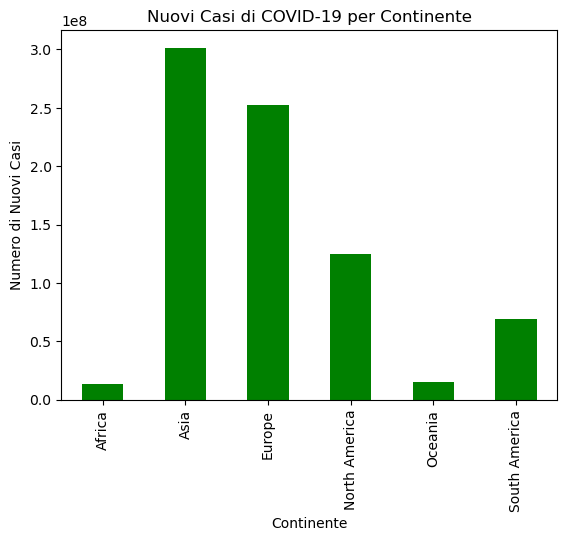

In [36]:
casi_per_continente = df_covid.groupby('continent')['new_cases'].sum()

casi_per_continente.plot(kind='bar',color='green')
plt.title('Nuovi Casi di COVID-19 per Continente')
plt.xlabel('Continente')
plt.ylabel('Numero di Nuovi Casi')

plt.show()

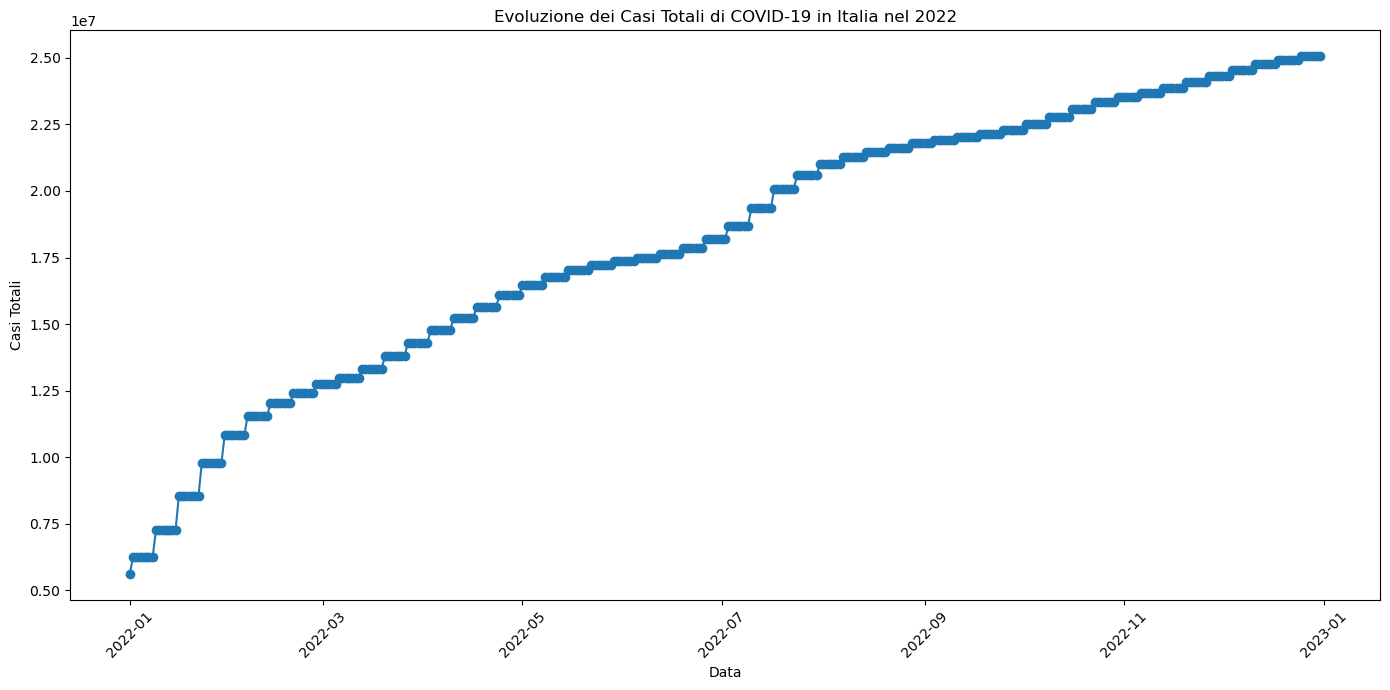

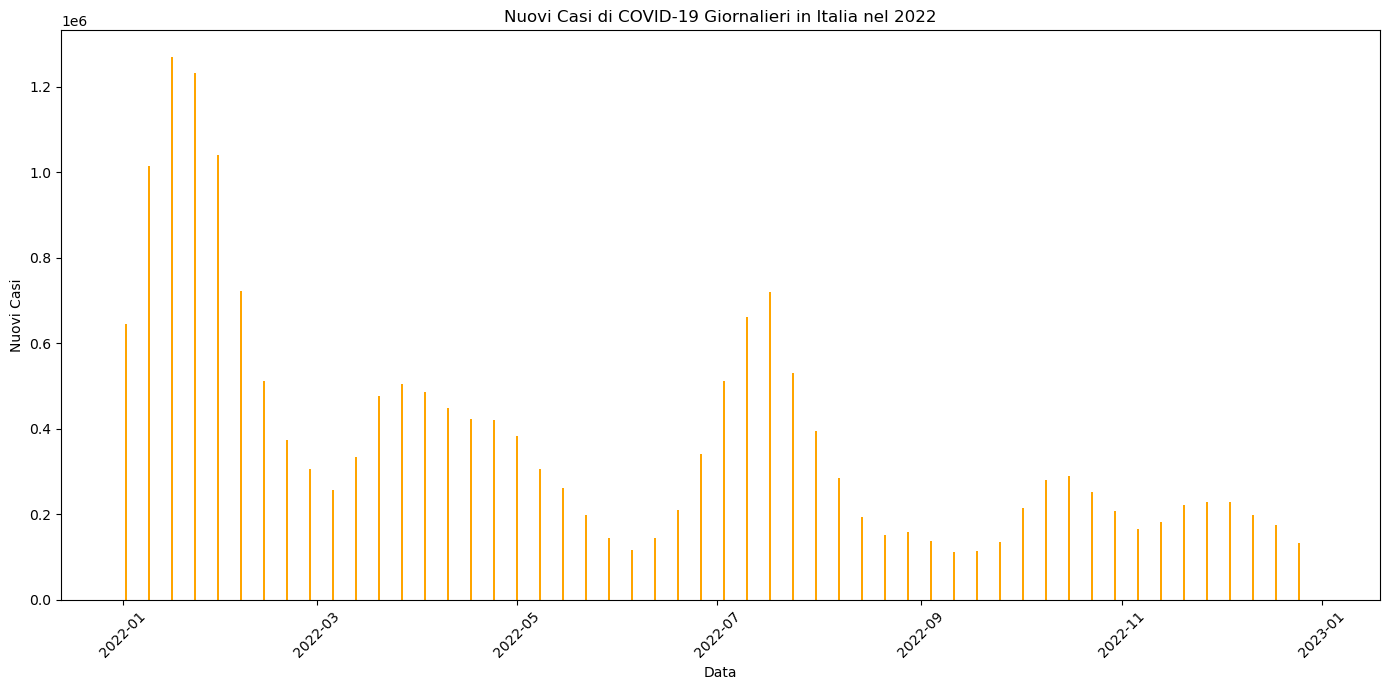

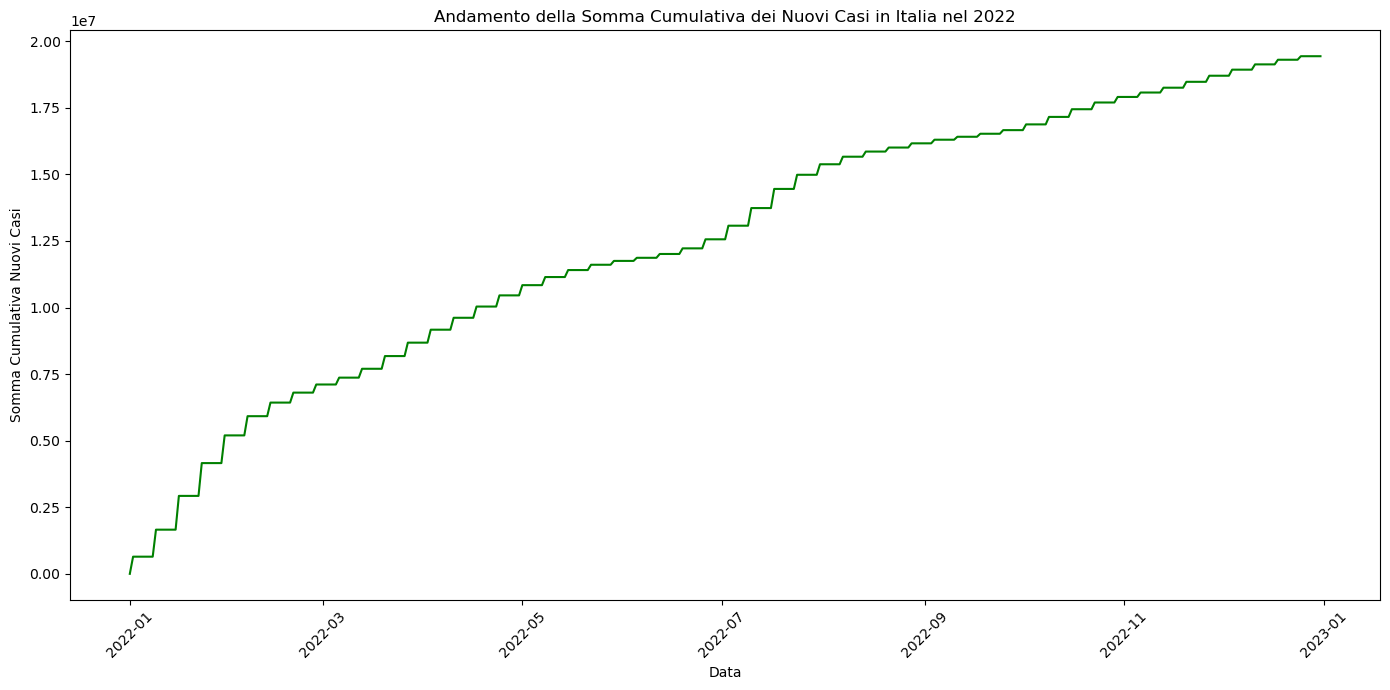

In [37]:
df_italy_2022 = df_covid[(df_covid['location'] == 'Italy') & 
                         (pd.to_datetime(df_covid['date']).dt.year == 2022)].copy()

plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(df_italy_2022['date']), df_italy_2022['total_cases'], marker='o', linestyle='-')
plt.title('Evoluzione dei Casi Totali di COVID-19 in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
plt.bar(pd.to_datetime(df_italy_2022['date']), df_italy_2022['new_cases'], color='orange')
plt.title('Nuovi Casi di COVID-19 Giornalieri in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_italy_2022['cumulative_new_cases'] = df_italy_2022['new_cases'].cumsum()

plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(df_italy_2022['date']), df_italy_2022['cumulative_new_cases'], marker='', linestyle='-', color='green')
plt.title('Andamento della Somma Cumulativa dei Nuovi Casi in Italia nel 2022')
plt.xlabel('Data')
plt.ylabel('Somma Cumulativa Nuovi Casi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

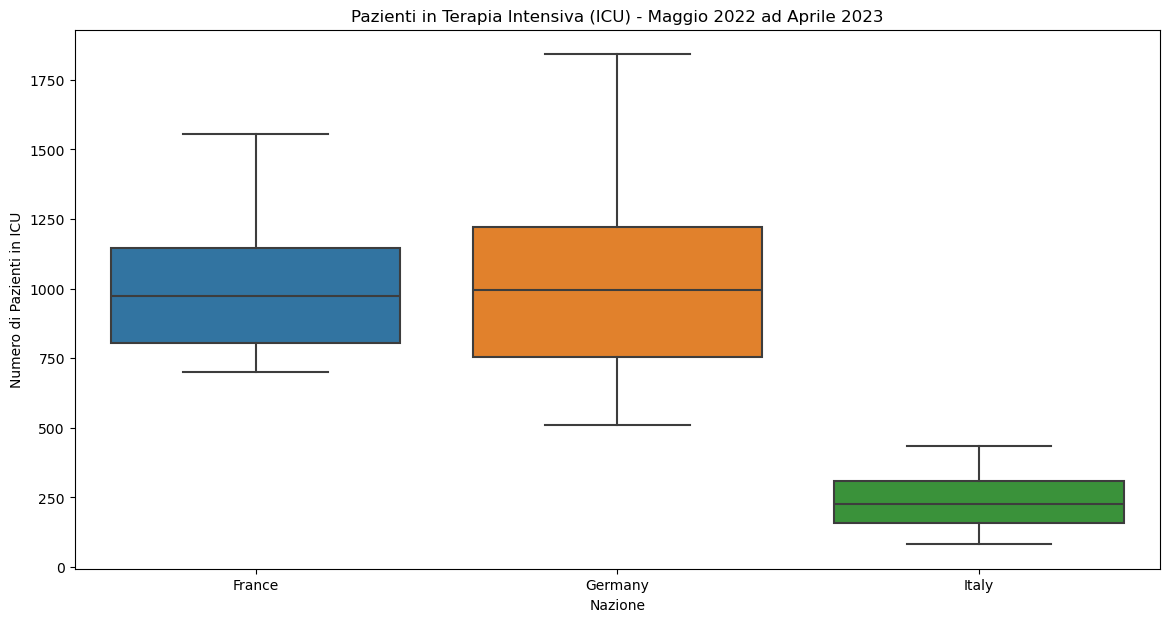

In [38]:
df_covid['date'] = pd.to_datetime(df_covid['date'])
start_date = "2022-05-01"
end_date = "2023-04-30"
nazioni_interesse = ['Italy', 'Germany', 'France']
df_filtrato = df_covid[
    (df_covid['location'].isin(nazioni_interesse)) & 
    (df_covid['date'] >= start_date) & 
    (df_covid['date'] <= end_date)]
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_filtrato, x='location', y='icu_patients')
plt.title('Pazienti in Terapia Intensiva (ICU) - Maggio 2022 ad Aprile 2023')
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in ICU')
plt.show()



In [39]:
nazioni= ['Italy','Germany', 'France','Spain']
df_nazioni_selezionate=df_covid[df_covid['location'].isin(nazioni) & ( pd.to_datetime(df_covid['date']).dt.year == 2023)].copy()

In [40]:
df_nazioni_selezionate.dropna(subset=['hosp_patients'], inplace = True )

In [41]:
somma_hosp_patients= df_nazioni_selezionate.groupby('location')['hosp_patients'].sum()

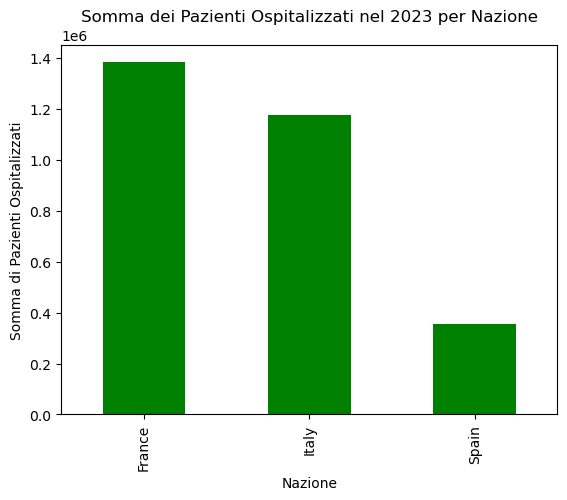

In [42]:
somma_hosp_patients.plot(kind='bar', color='green')
plt.title('Somma dei Pazienti Ospitalizzati nel 2023 per Nazione')
plt.xlabel('Nazione')
plt.ylabel('Somma di Pazienti Ospitalizzati')
plt.show()